<a href="https://colab.research.google.com/github/eaguilar98/python_portfolio/blob/main/sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de librerias base

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## Carga de la info

In [ ]:
#Inicializamos el archivo donde esta la info
archivo="/content/drive/MyDrive/DEV.F/proyecto 1/forbes-dataset-2020.csv"
# Cargar la info
df=pd.read_csv(archivo)

In [ ]:
df["Current Rank"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Limpieza de la info

In [ ]:
# Copiamos el dataframe para no alterar el original
df2=df.copy()

In [ ]:
#Pasamos a mayusculas para tratar de dejar iguales los datos
df2["Sport"]=df["Sport"].str.upper()
df2["Name"]=df["Name"].str.upper()
df2["Nationality"]=df["Nationality"].str.upper()

#### Limpiamos los deportes

In [ ]:
df2["Sport"].unique()

array(['BOXING', 'AUTO RACING', 'GOLF', 'BASKETBALL', 'TENNIS', 'NFL',
       'NBA', 'BASEBALL', 'ICE HOCKEY', 'AMERICAN FOOTBALL / BASEBALL',
       'F1 MOTORSPORTS', 'NASCAR', 'HOCKEY', 'AUTO RACING (NASCAR)',
       'F1 RACING', 'AMERICAN FOOTBALL', 'SOCCER', 'CYCLING',
       'MOTORCYCLE GP', 'MMA'], dtype=object)

In [ ]:
#Arrglamos los deportes
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("NBA","BASKETBALL"))
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("AUTO RACING (NASCAR)","NASCAR"))
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("NFL","AMERICAN FOOTBALL"))
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("ICE HOCKEY","HOCKEY"))
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("ICE HOCKEY","HOCKEY"))
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("AMERICAN FOOTBALL / BASEBALL","AMERICAN FOOTBALL"))
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("AUTO RACING","F1 RACING"))
df2["Sport"]=df2["Sport"].apply(lambda x: x.replace("F1 MOTORSPORTS","F1 RACING"))

In [ ]:
# como quedaron los deportes
df2["Sport"].unique()

array(['BOXING', 'F1 RACING', 'GOLF', 'BASKETBALL', 'TENNIS',
       'AMERICAN FOOTBALL', 'BASEBALL', 'HOCKEY', 'NASCAR', 'SOCCER',
       'CYCLING', 'MOTORCYCLE GP', 'MMA'], dtype=object)

**Caso especial**  *Deion Luwynn Sanders Sr.* (9 de agosto de 1967) es un jugador y entrenador de fútbol americano, jugador de béisbol y comentarista deportivo estadounidense.1​ Es el único deportista en disputar al mismo tiempo una **super Bowl y una Serie Mundial**.

https://es.wikipedia.org/wiki/Deion_Sanders

#### Limpiamos la columna Previous Year Rank

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [ ]:
# Los NaN de la columna Previous Year Rank  los convertimos en 0
df2["Previous Year Rank"].fillna(120, inplace=True)

In [ ]:
#Limpiamos valores no numericos con 0
df2["Previous Year Rank"][df2["Previous Year Rank"]=="not ranked"]=120
df2["Previous Year Rank"][df2["Previous Year Rank"]=="??"]=0
df2["Previous Year Rank"][df2["Previous Year Rank"]=="?"]=0
df2["Previous Year Rank"][df2["Previous Year Rank"]==">30"]=31
df2["Previous Year Rank"][df2["Previous Year Rank"]==">40"]=41
df2["Previous Year Rank"][df2["Previous Year Rank"]==">10"]=11
df2["Previous Year Rank"][df2["Previous Year Rank"]==">20"]=21
df2["Previous Year Rank"][df2["Previous Year Rank"]==">14"]=15
df2["Previous Year Rank"][df2["Previous Year Rank"]==">100"]=101
df2["Previous Year Rank"][df2["Previous Year Rank"]=="none"]=0

In [ ]:
df2["Previous Year Rank"].unique()

array([120, '8', '1', 31, '4', '5', '12', '6', '3', '9', '17', '13', '10',
       41, '19', '40', '7', '11', '30', '22', '20', '38', '2', '15', '14',
       '26', 0, '18', 11, 21, '24', '21', 15, 101], dtype=object)

#### Limpiamos la columna S.NO

In [ ]:
# Borramos la columna S.NO que no tiene valor
df2.drop(columns=["S.NO"], inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    301 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


#### Agregamos una columna de tipo datetime con formato año

In [ ]:
#Agregamos la columna year_dt como datetime64[ns] en formato de year_dt
df2['year_dt'] = pd.to_datetime(df2['Year'],format='%Y')

#Cambiamos el formato a año
df2["year_dt"]=pd.DatetimeIndex(df2["year_dt"]).year

In [ ]:
# Veamos los valores de la columna de fecha
df2["year_dt"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

### Limpiamos la columna Name = Nombre del Jugador

In [ ]:
df2["Name"].sort_values(ascending=True).unique()

array(['AARON RODGERS', 'AARON ROGERS', 'ALAIN PROST', 'ALEX RODRIGUEZ',
       'ANDRE AGASSI', 'ANDREW LUCK', 'ARNOLD PALMER', 'AYRTON SENNA',
       'BUSTER DOUGLAS', 'CAM NEWTON', 'CANELO ALVAREZ', 'CARSON WENTZ',
       'CECIL FIELDER', 'CONOR MCGREGOR', 'CRISTIANO RONALDO',
       'DALE EARNHARDT', 'DALE EARNHARDT JR.', 'DAVID BECKHAM',
       'DEION SANDERS', 'DENNIS RODMAN', 'DONOVAN "RAZOR" RUDDOCK',
       'DREW BREES', 'ELI MANNING', 'EMMIT SMITH', 'EVANDER HOLYFIELD',
       'FLOYD MAYWEATHER', 'GARY SHEFFIELD', 'GEORGE FOREMAN',
       'GERHARD BERGER', 'GRANT HILL', 'GREG NORMAN', 'JACK NICKLAUS',
       'JACQUES VILLENEUVE', 'JAMES HARDEN', 'JEFF GORDON', 'JIM COURIER',
       'JOE MONTANA', 'JOE SAKIC', 'JORDAN SPIETH', 'KEVIN DURANT',
       'KEVIN GARNETT', 'KIMI RAIKKONEN', 'KIRK COUSINS', 'KOBE BRYANT',
       'LANCE ARMSTRONG', 'LEBRON JAMES', 'LENNOX LEWIS',
       'LEWIS HAMILTON', 'LIONEL MESSI', 'MANNY PACQUIAO', 'MATT RYAN',
       'MATTHEW STAFFORD', 'MICHAEL 

In [ ]:
# Arreglamos los nombres
df2["Name"]=df2["Name"].apply(lambda x: x.replace("AARON ROGERS","AARON RODGERS"))

In [ ]:
df2["Name"].sort_values(ascending=True).unique()

array(['AARON RODGERS', 'ALAIN PROST', 'ALEX RODRIGUEZ', 'ANDRE AGASSI',
       'ANDREW LUCK', 'ARNOLD PALMER', 'AYRTON SENNA', 'BUSTER DOUGLAS',
       'CAM NEWTON', 'CANELO ALVAREZ', 'CARSON WENTZ', 'CECIL FIELDER',
       'CONOR MCGREGOR', 'CRISTIANO RONALDO', 'DALE EARNHARDT',
       'DALE EARNHARDT JR.', 'DAVID BECKHAM', 'DEION SANDERS',
       'DENNIS RODMAN', 'DONOVAN "RAZOR" RUDDOCK', 'DREW BREES',
       'ELI MANNING', 'EMMIT SMITH', 'EVANDER HOLYFIELD',
       'FLOYD MAYWEATHER', 'GARY SHEFFIELD', 'GEORGE FOREMAN',
       'GERHARD BERGER', 'GRANT HILL', 'GREG NORMAN', 'JACK NICKLAUS',
       'JACQUES VILLENEUVE', 'JAMES HARDEN', 'JEFF GORDON', 'JIM COURIER',
       'JOE MONTANA', 'JOE SAKIC', 'JORDAN SPIETH', 'KEVIN DURANT',
       'KEVIN GARNETT', 'KIMI RAIKKONEN', 'KIRK COUSINS', 'KOBE BRYANT',
       'LANCE ARMSTRONG', 'LEBRON JAMES', 'LENNOX LEWIS',
       'LEWIS HAMILTON', 'LIONEL MESSI', 'MANNY PACQUIAO', 'MATT RYAN',
       'MATTHEW STAFFORD', 'MICHAEL JORDAN', 'MICHAE

### La columna nacionalidad

In [ ]:
df2["Nationality"].sort_values(ascending=True).unique()
# Todo en orden 

array(['ARGENTINA', 'AUSTRALIA', 'AUSTRIA', 'BRAZIL', 'CANADA',
       'DOMINICAN', 'FILIPINO', 'FINLAND', 'FRANCE', 'GERMANY', 'IRELAND',
       'ITALY', 'MEXICO', 'NORTHERN IRELAND', 'PHILIPPINES', 'PORTUGAL',
       'RUSSIA', 'SERBIA', 'SPAIN', 'SWITZERLAND', 'UK', 'USA'],
      dtype=object)

In [ ]:
df2["Nationality"]=df2["Nationality"].apply(lambda x: x.replace("PHILIPPINES","FILIPINO"))

In [ ]:
#Pasamos el rank a int
df2["Current Rank"]=df2["Current Rank"].astype('int64')

In [ ]:
#Pasamos el rank anterior a entero
df2["Previous Year Rank"]=df2["Previous Year Rank"].astype('int64')

In [ ]:
# creamos la columna rank_improve , si =1 su rank mejoro
df2["rank_improve"]=np.where(
    (df2["Current Rank"]< df2["Previous Year Rank"]),
    1,
    0
)

In [ ]:
df2["c"]=1

### Copiamos al df final ya limpio

In [ ]:
df3=df2.copy()

In [ ]:
df3.to_csv("/content/drive/MyDrive/DEV.F/proyecto 1/datos_limpios.csv")

### Que queremos saber



1.   Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.
1.   Atleta con el menor número de apariciones y mayores ganancias.
1.   Deporte y país con mayor número de atletas no rankeados que entraron en     la   lista de atletas mejor pagados.
2.   País con mayor número de deportes con atletas en el dataset.
2.   ¿Cuántos atletas por deporte tiene cada país?
2.   Atleta con mayores ganancias por deporte por década
1.   Ganancia total por cada deporte por cada año.






## Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [ ]:
df2.to_csv("/content/drive/MyDrive/DEV.F/proyecto 1/datos_limpios.csv")

In [ ]:
players=df2["Name"].sort_values(ascending=True).unique()

In [ ]:
def crecimiento_jugador(jugadores, datos):
    list_of_dic={}
    crecimiento=0
    #revisamos jugador por jugador
    for jugador in jugadores:  
        # Iteramos en los datos del jugador en años mayores a 2010      
        for index, row in datos[(datos["Name"]==jugador) & (datos["year_dt"]>=2010)].iterrows(): 
            current=int(row["Current Rank"])
            previous=int(row["Previous Year Rank"])
            #Si el rank actual es menos al pasado, subio de rank
            if current<previous:                
                crecimiento=crecimiento+1
        if crecimiento>2:            
            list_of_dic[jugador]=crecimiento
        crecimiento=0
    #creamos un dataFrame
    data_frame=pd.DataFrame(list(list_of_dic.items()), columns=["jugador","crecimiento_rankin"])
    return data_frame


In [ ]:
upRankin_df=crecimiento_jugador(players,df2)

In [ ]:
upRankin_df=upRankin_df.sort_values("crecimiento_rankin",ascending=True)

In [ ]:
upRankin_df.to_csv("/content/drive/MyDrive/DEV.F/proyecto 1/crecimiento_jugadores.csv")

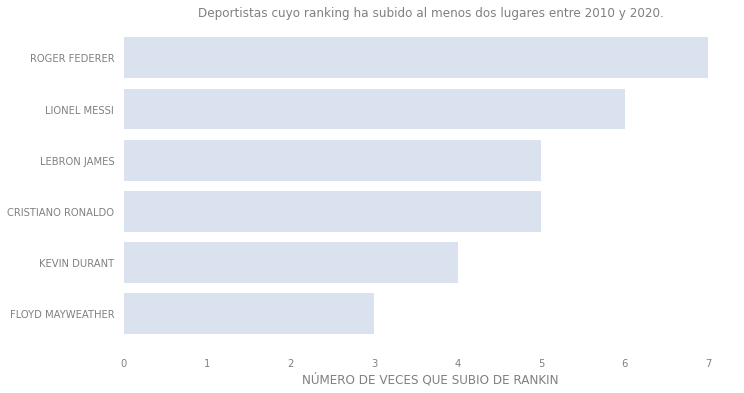

In [ ]:
fig = plt.figure(figsize =(11, 6))
plt.barh(upRankin_df["jugador"], upRankin_df["crecimiento_rankin"], align='center', alpha=0.2, edgecolor = "none")
plt.box(False)

#Titulos
plt.title("Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.", color="#808080")
plt.xlabel("NÚMERO DE VECES QUE SUBIO DE RANKIN", color="#808080")


#Etiquetas
plt.xticks(fontsize=10, color="#808080")
plt.yticks(fontsize=10, color="#808080")

plt.show()


##Atleta con el menor número de apariciones y mayores ganancias.

In [ ]:
df_agrupado = df2.groupby(["Name"])[["c", "earnings ($ million)"]].sum()
df_agrupado=df_agrupado.sort_values(by=["c","earnings ($ million)"], ascending=(True, False))
df_agrupado.reset_index(inplace=True)

In [ ]:
df_agrupado.head(10)

,Name,c,earnings ($ million)
0,CONOR MCGREGOR,1,99.0
1,CANELO ALVAREZ,1,94.0
2,RUSSELL WILSON,1,89.5
3,KIRK COUSINS,1,60.5
4,MATTHEW STAFFORD,1,59.5
5,CARSON WENTZ,1,59.1
6,NOVAK DJOKOVIC,1,55.8
7,MUHAMMAD ALI,1,55.0
8,CAM NEWTON,1,53.1
9,JORDAN SPIETH,1,52.8


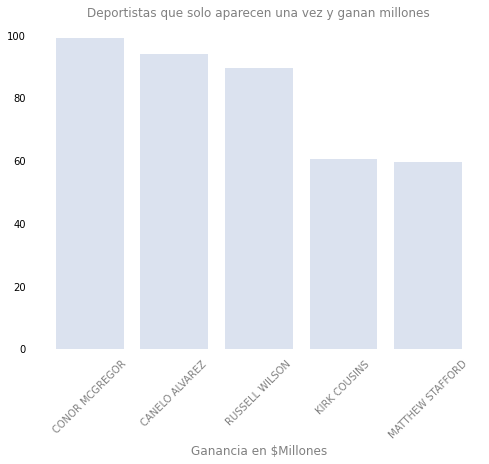

In [ ]:
fig = plt.figure(figsize =(8, 6))
plt.bar(df_agrupado["Name"].head(5), df_agrupado["earnings ($ million)"].head(5), align='center', alpha=0.2, edgecolor = "none")
plt.box(False)

#Titulos
plt.title("Deportistas que solo aparecen una vez y ganan millones", color="#808080")
plt.xlabel("Ganancia en $Millones", color="#808080")


#Etiquetas
plt.xticks(fontsize=10, color="#808080",rotation=45)
plt.yticks(fontsize=10, color="#000000")

plt.show()


## Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

In [ ]:
df2["Current Rank"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df2.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'Year', 'earnings ($ million)', 'year_dt', 'rank_improve', 'c'],
      dtype='object')

In [ ]:
df_agrupado=df2.groupby(["Sport","Nationality"])[["c"]].sum().sort_values("c", ascending=False)
df_agrupado.reset_index(inplace=True)
#df_agrupado

In [ ]:
df_heatmap=df_agrupado.pivot("Sport","Nationality","c")

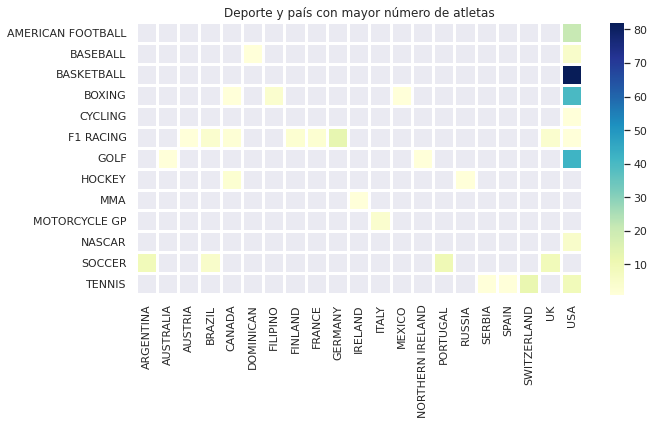

In [ ]:
plt.figure(figsize=(10,5))
sns.set()
ax = sns.heatmap(df_heatmap,linewidths=2,cmap="YlGnBu")
plt.title("Deporte y país con mayor número de atletas")
plt.ylabel("")
plt.xlabel("")

plt.show()

###País con mayor número de deportes con atletas en el dataset.

In [ ]:
df_agrupado=df2.groupby(["Nationality"])["c"].sum().sort_values(ascending=True).to_frame()
df_agrupado.reset_index(inplace=True)
df_agrupado
#df_agrupado=df_agrupado.sort_values("c", ascending=True)

,Nationality,c
0,IRELAND,1
1,AUSTRALIA,1
2,AUSTRIA,1
3,SPAIN,1
4,DOMINICAN,1
5,SERBIA,1
6,RUSSIA,1
7,MEXICO,1
8,NORTHERN IRELAND,1
9,FINLAND,3


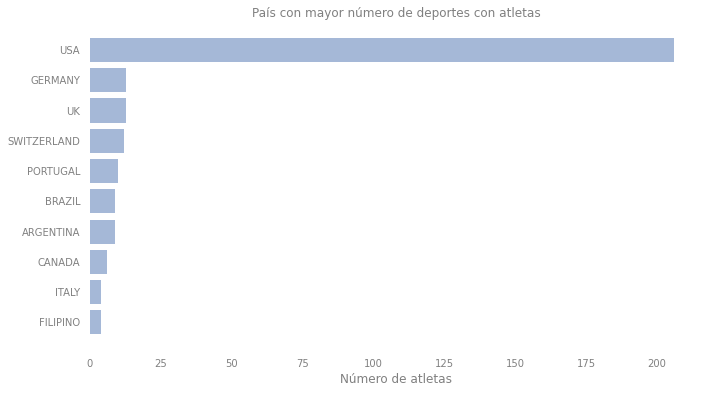

In [ ]:
fig = plt.figure(figsize =(11, 6))
plt.barh(df_agrupado["Nationality"].tail(10), df_agrupado["c"].tail(10), align='center', alpha=0.5, edgecolor = "none")
plt.box(False)

#Titulos
plt.title("País con mayor número de deportes con atletas", color="#808080")
plt.xlabel("Número de atletas", color="#808080")


#Etiquetas
plt.xticks(fontsize=10, color="#808080")
plt.yticks(fontsize=10, color="#808080")

plt.show()


###¿Cuántos atletas por deporte tiene cada país?

In [ ]:
df_agrupado=df2.groupby(["Sport"])["c"].sum().sort_values(False).to_frame()
df_agrupado.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df_agrupado=df_agrupado.sort_values(["c"], ascending=True)
df_agrupado

,Sport,c
0,CYCLING,1
1,MMA,1
2,HOCKEY,4
3,MOTORCYCLE GP,4
4,NASCAR,5
5,BASEBALL,6
6,AMERICAN FOOTBALL,21
7,TENNIS,23
8,F1 RACING,31
9,SOCCER,33


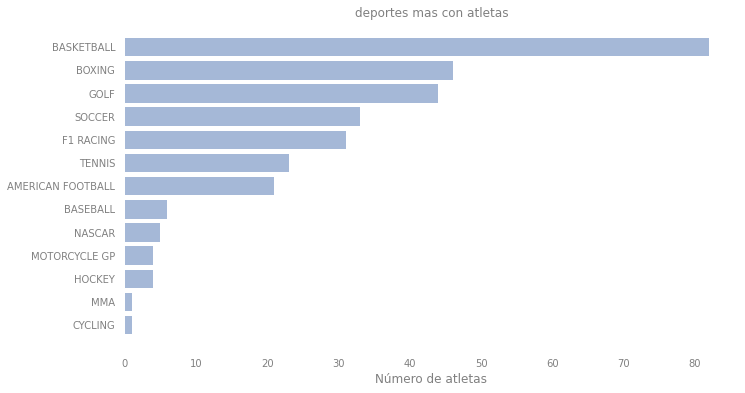

In [ ]:
fig = plt.figure(figsize =(11, 6))
plt.barh(df_agrupado["Sport"].tail(20), df_agrupado["c"].tail(20), align='center', alpha=0.5, edgecolor = "none")
plt.box(False)

#Titulos
plt.title("deportes mas con atletas", color="#808080")
plt.xlabel("Número de atletas", color="#808080")


#Etiquetas
plt.xticks(fontsize=10, color="#808080")
plt.yticks(fontsize=10, color="#808080")

plt.show()

##Atleta con mayores ganancias por deporte por década

In [ ]:
#creamos los bins
df2['Decada'] = pd.cut(x=df2['Year'], 
                       bins=[1980,1989,2000,2010,2020,2030], 
                       labels=["1980>","1990-1999","2000-2009","2010-2020","2020-2030"])

In [ ]:
#Agrupamos las ganancias por decada, deportista y deporte
df_agrupado=df2.groupby(["Name","Sport","Decada"])["earnings ($ million)"].sum().to_frame()
#Quitamos los valores en 0
df_agrupado=df_agrupado[df_agrupado["earnings ($ million)"]>0]
df_agrupado.reset_index(inplace=True)
df_agrupado=df_agrupado.sort_values(["earnings ($ million)","Sport","Name","Decada",], ascending=(False,True, True, True))
df_agrupado.reset_index(inplace=True)

In [ ]:
#Obtenemos los valores unicos para decada y deporte
decadas=df_agrupado["Decada"].unique().sort_values(ascending=True).unique()
deportes=df_agrupado["Sport"].sort_values(ascending=True).unique()

In [ ]:
#Armamos un data frame con los mejores pagados por decada, deporte y año
best_dude=pd.DataFrame()
for deporte in deportes:
    for decada in decadas:
        #Por cada deporte de cada decada sacamos el deportista mejor pagado y lo agregamos a un dataframe
        best_dude=pd.DataFrame.append((df_agrupado[(df_agrupado["Sport"]==deporte)&(df_agrupado["Decada"]==decada)].sort_values(by=(["earnings ($ million)","Decada"]),ascending=(False,True)).head(1)),other=best_dude)               

In [ ]:
#Ordenamos el data frame
best_dude=best_dude.sort_values(["Sport","Decada"] , ascending=(True,True))

In [ ]:
#Nos quedamos con los datos en csv
best_dude.to_csv("/content/drive/MyDrive/DEV.F/proyecto 1/best_dude.csv")

In [ ]:
def grafica_bestDude(datos, deporte):

    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center')

    fig = plt.figure(figsize =(6, 3))
    bar_plot =plt.bar(datos["Decada"], datos["earnings ($ million)"], align='center', alpha=0.2, edgecolor = "none")
    plt.box(True)

    #Titulos
    plt.title("Deportista mejor pagado por decada en: "+ deporte, color="#808080")
    plt.xlabel("Decadas", color="#808080")
    plt.ylabel("Millones de DLLS", color="#808080")
    
    for ind in datos.index:
        plt.text(datos["Decada"][ind],datos["earnings ($ million)"][ind],datos["Name"][ind], ha = 'center', color="#000000", fontsize=8)

    #Etiquetas
    plt.xticks(fontsize=10, color="#808080")
    plt.yticks(fontsize=10, color="#808080")

    plt.show()

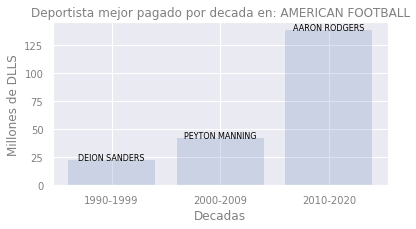

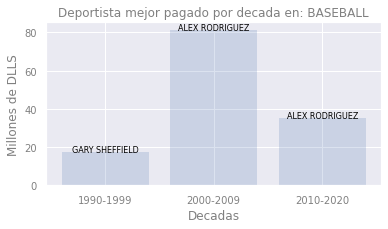

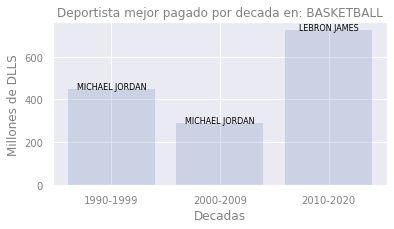

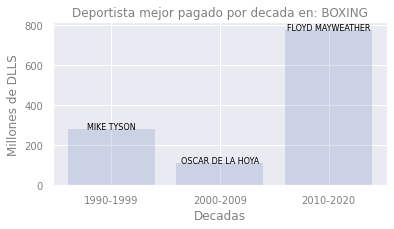

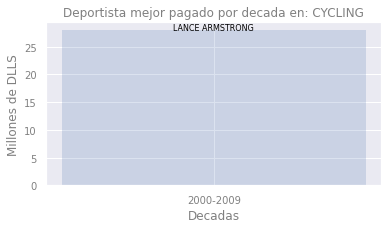

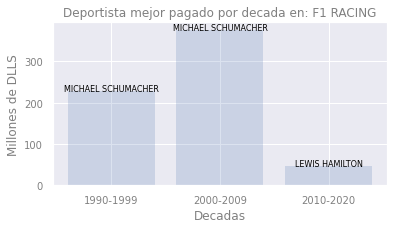

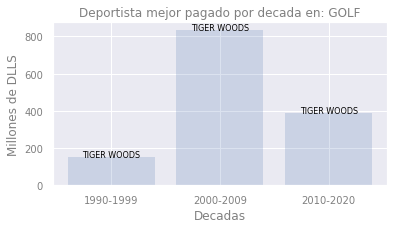

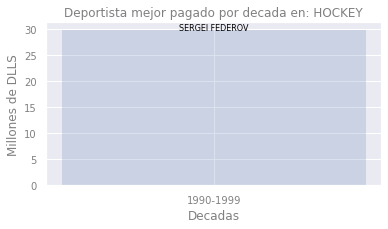

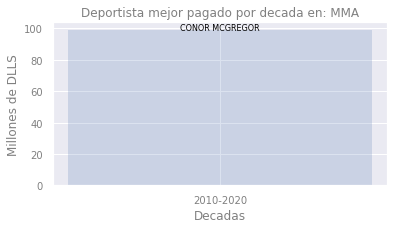

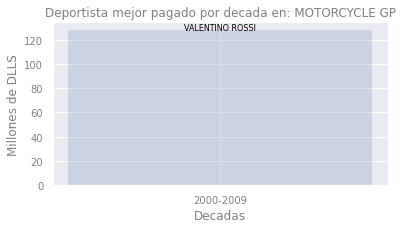

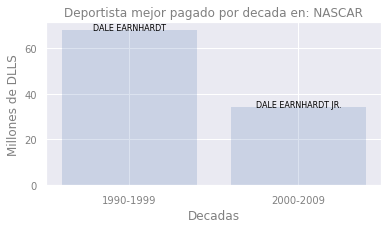

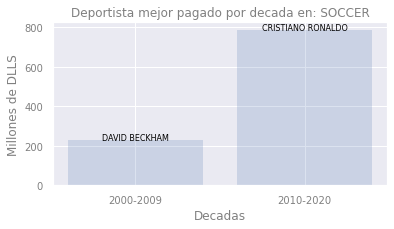

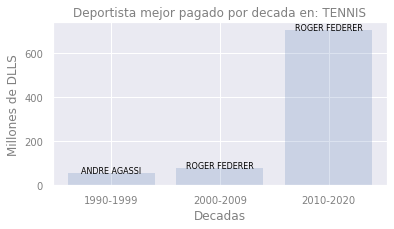

In [ ]:
for deporte in deportes:
    grafica_bestDude(best_dude[best_dude["Sport"]==deporte],deporte)

##Ganancia total por cada deporte por cada año

In [ ]:
df2.columns

Index(['Name', 'Nationality', 'Current Rank', 'Previous Year Rank', 'Sport',
       'Year', 'earnings ($ million)', 'year_dt', 'rank_improve', 'c',
       'Decada'],
      dtype='object')

In [ ]:
df_agrupado=df2.groupby(["Sport","year_dt"])["earnings ($ million)"].sum().to_frame()
df_agrupado.reset_index(inplace=True)

In [ ]:
df_agrupado

,Sport,year_dt,earnings ($ million)
0,AMERICAN FOOTBALL,1992,9.5
1,AMERICAN FOOTBALL,1993,11.5
2,AMERICAN FOOTBALL,1995,22.5
3,AMERICAN FOOTBALL,1996,16.5
4,AMERICAN FOOTBALL,2004,42.0
...,...,...,...
168,TENNIS,2016,123.6
169,TENNIS,2017,64.0
170,TENNIS,2018,77.2
171,TENNIS,2019,93.4


In [ ]:
deportes=df_agrupado["Sport"].unique()

In [ ]:
def grafica_deportes(df, deporte):

        df_filtro=df[df_agrupado["Sport"]==deporte]
        fig = plt.figure(figsize =(11, 6))
        plt.plot(df_filtro["year_dt"], df_filtro["earnings ($ million)"], alpha=0.5,)
        plt.box(True)
        plt.grid(True)

        #Titulos
        plt.title(deporte+" Ganancia total por cada deporte por cada año", color="#808080")
        plt.xlabel("Años", color="#808080")
        plt.ylabel("Millones de Dlls", color="#808080")


        #Etiquetas
        plt.xticks(fontsize=10, color="#808080")
        plt.yticks(fontsize=10, color="#808080")

        plt.show()

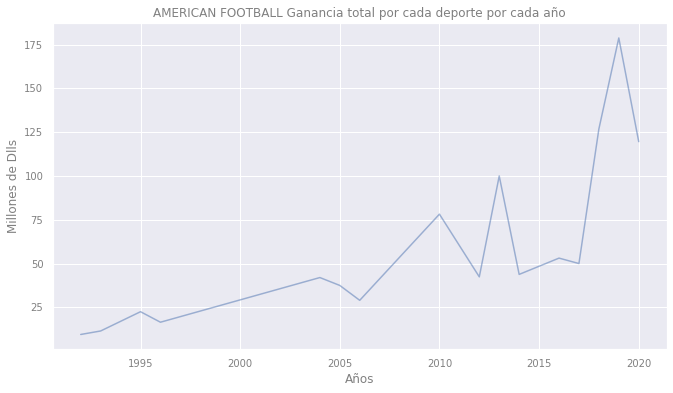

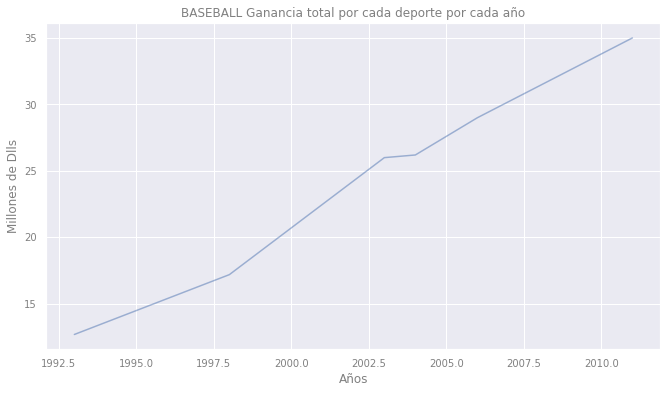

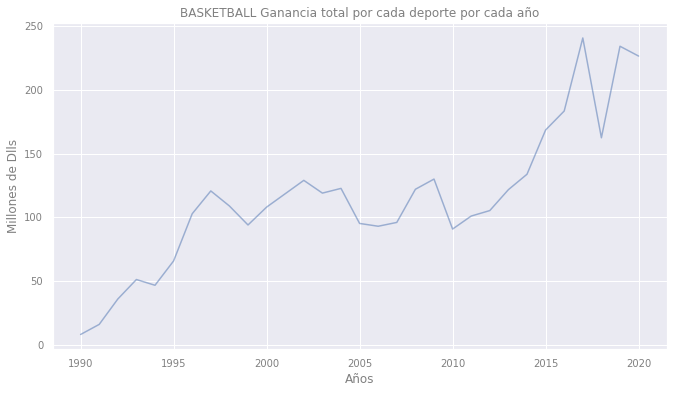

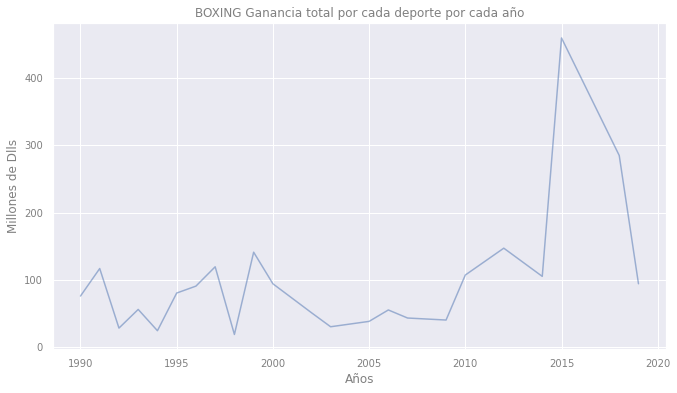

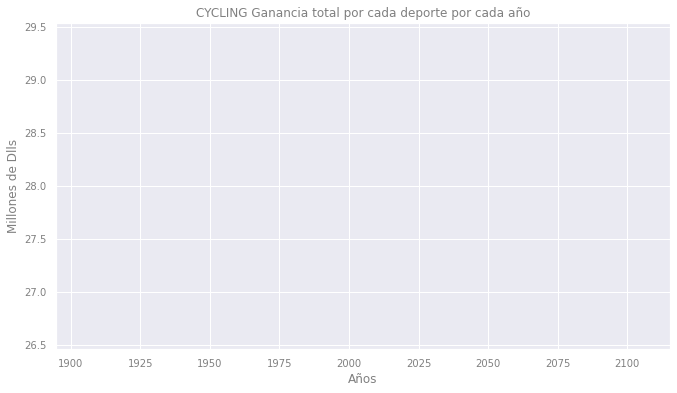

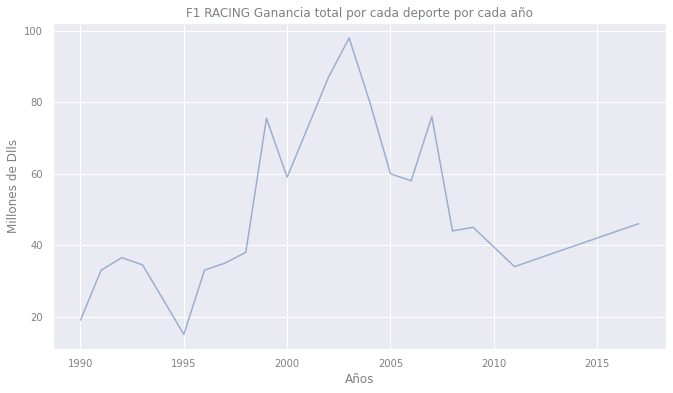

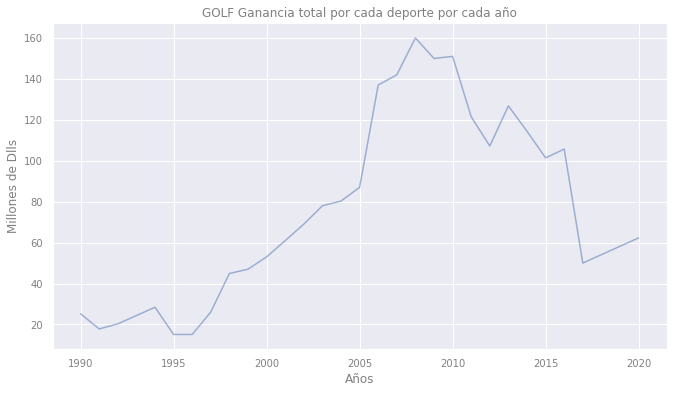

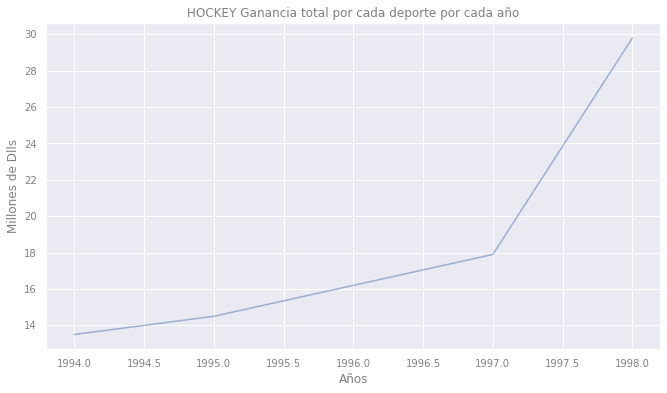

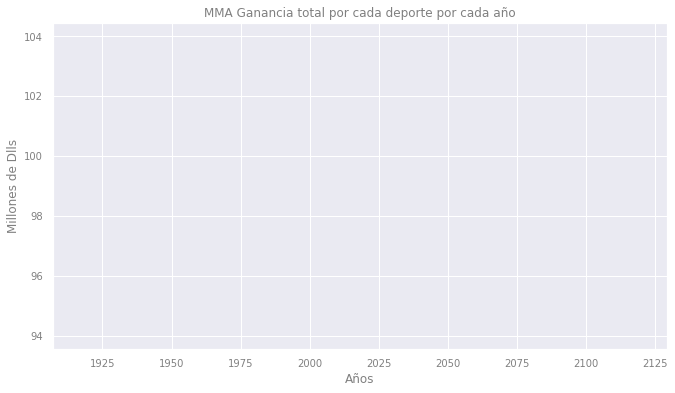

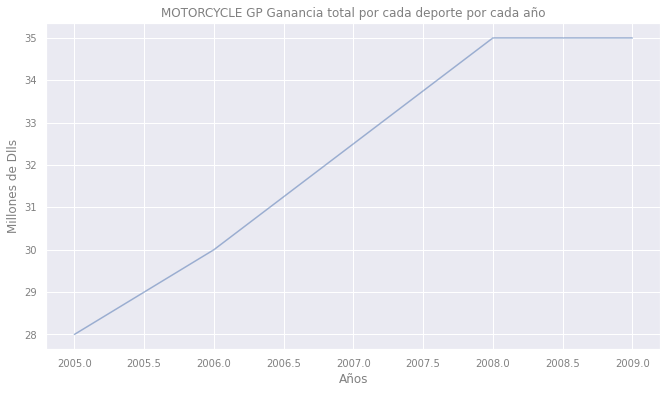

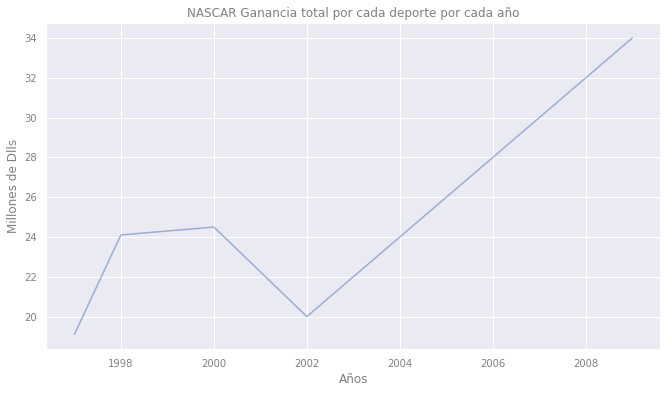

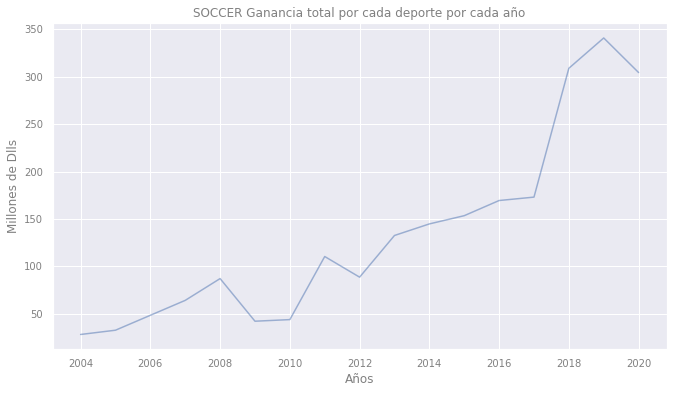

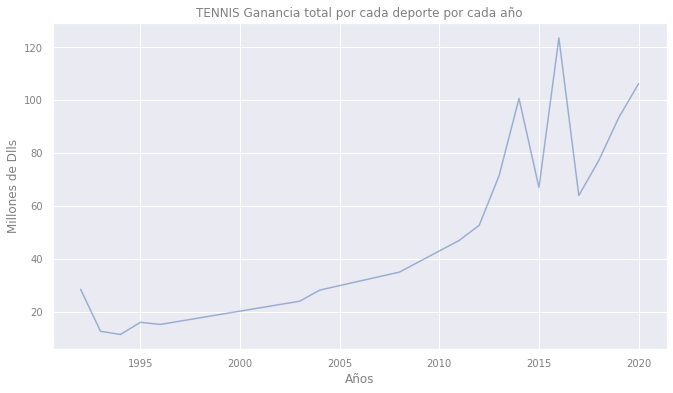

In [ ]:
for deporte in deportes:
    grafica_deportes(df_agrupado, deporte)